In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1eMBXN1NBQ55zj_WpNJljSaXFyEhDjhVn' #-- Updated File ID for my zip
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('indian_liver_patient.csv')

In [1]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scikitplot as skplt
from keras.layers.convolutional import Convolution2D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Liver_alfOnly (1).csv")
df

,Unnamed: 0,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,Source of Care,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,0,65,M,east,56.00,162.1,21.31,0.0,83.6,135.0,...,Governament Hospital,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,1,36,M,south,60.20,162.2,22.88,0.0,76.6,96.0,...,Never Counsulted,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,2,66,M,east,83.90,162.5,31.77,1.0,113.2,115.0,...,Never Counsulted,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,3,54,M,east,69.40,160.5,26.94,0.0,77.9,110.0,...,Private Hospital,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,4,63,M,north,73.10,159.2,28.84,0.0,89.3,132.0,...,clinic,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,5,26,F,east,119.30,193.2,31.96,1.0,117.9,129.0,...,Private Hospital,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,6,66,F,north,85.10,172.1,28.73,0.0,99.2,137.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,8,53,M,east,75.20,174.1,24.81,0.0,85.6,110.0,...,Private Hospital,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
8,11,47,M,south,49.00,155.3,20.32,0.0,78.6,146.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
9,12,62,F,south,56.10,165.5,20.48,0.0,78.7,201.0,...,Private Hospital,1,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [3]:
df=df.fillna(df.mean())
df

,Unnamed: 0,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,Source of Care,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,0,65,M,east,56.00,162.1,21.31,0.0,83.6,135.0,...,Governament Hospital,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,1,36,M,south,60.20,162.2,22.88,0.0,76.6,96.0,...,Never Counsulted,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,2,66,M,east,83.90,162.5,31.77,1.0,113.2,115.0,...,Never Counsulted,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,3,54,M,east,69.40,160.5,26.94,0.0,77.9,110.0,...,Private Hospital,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,4,63,M,north,73.10,159.2,28.84,0.0,89.3,132.0,...,clinic,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
5,5,26,F,east,119.30,193.2,31.96,1.0,117.9,129.0,...,Private Hospital,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0
6,6,66,F,north,85.10,172.1,28.73,0.0,99.2,137.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
7,8,53,M,east,75.20,174.1,24.81,0.0,85.6,110.0,...,Private Hospital,1,1.0,1,0.0,0,0.0,0.0,0.0,0.0
8,11,47,M,south,49.00,155.3,20.32,0.0,78.6,146.0,...,Private Hospital,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0
9,12,62,F,south,56.10,165.5,20.48,0.0,78.7,201.0,...,Private Hospital,1,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [4]:
df = df.drop(['Unnamed: 0','Physical Activity','PVD', 'Source of Care','Family  HyperTension','Family Hepatitis','Chronic Fatigue','PVD','Region'],axis=1)

In [5]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df

,Age,Gender,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,Total Cholesterol,Dyslipidemia,Alcohol Consumption,HyperTension,Diabetes,Family Diabetes,Hepatitis,ALF
0,65,1,56.00,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,297.0,0,1,0.0,0.0,1,1.0,0.0
1,36,1,60.20,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,166.0,0,0,0.0,0.0,0,0.0,0.0
2,66,1,83.90,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,255.0,1,1,0.0,1.0,0,0.0,0.0
3,54,1,69.40,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,230.0,0,1,0.0,0.0,0,0.0,0.0
4,63,1,73.10,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,221.0,0,0,1.0,0.0,0,0.0,0.0
5,26,0,119.30,193.2,31.96,1.0,117.9,129.0,70.0,43.0,159.0,202.0,0,0,0.0,0.0,0,0.0,0.0
6,66,0,85.10,172.1,28.73,0.0,99.2,137.0,92.0,41.0,143.0,184.0,0,0,1.0,0.0,0,0.0,0.0
7,53,1,75.20,174.1,24.81,0.0,85.6,110.0,74.0,62.0,110.0,172.0,0,1,1.0,0.0,0,0.0,0.0
8,47,1,49.00,155.3,20.32,0.0,78.6,146.0,87.0,76.0,133.0,209.0,0,0,1.0,0.0,0,0.0,0.0
9,62,0,56.10,165.5,20.48,0.0,78.7,201.0,119.0,55.0,171.0,226.0,0,1,1.0,0.0,0,0.0,0.0


Splitting Dataset

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(['ALF'],axis=1)
y = df.drop(['Age','Gender', 'Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'Alcohol Consumption', 'HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)


Export Splited traning and test Dataset

In [41]:
X_train=pd.read_csv("ALFXtrain.csv")
y_train=pd.read_csv("ALFytrain.csv")
X_test=pd.read_csv("ALFXtest.csv")
y_test=pd.read_csv("ALFytest.csv")

In [45]:
X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_test = X_test.drop(['Unnamed: 0'],axis=1)
y_train = y_train.drop(['Unnamed: 0'],axis=1)
y_test = y_test.drop(['Unnamed: 0'],axis=1)

In [24]:
y_train.groupby(['ALF']).size()

ALF
0.0    2449
1.0     299
dtype: int64

SVM Model

In [148]:
from sklearn.svm import SVC
svmg = SVC(gamma= 0.0000001, C=0.2,max_iter=100,probability=True)
svmg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
  max_iter=100, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
svmg.score(X_test, y_test)

0.7860262008733624

In [150]:
y_pred = svmg.predict(X_test)
#y_pred = [ 0 if y>=0.5 else 1 for y in y_pred ]
#y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       614
         1.0       0.28      0.64      0.39        73

   micro avg       0.79      0.79      0.79       687
   macro avg       0.61      0.72      0.63       687
weighted avg       0.88      0.79      0.82       687



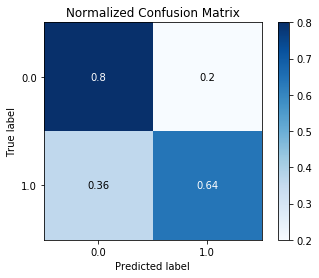

In [151]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
lr.score(X_test, y_test)

0.9097525473071325

In [63]:
y_pred = lr.predict(X_test)
#y_pred = [ 0 if y>=0.5 else 1 for y in y_pred ]
#y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       614
         1.0       0.67      0.30      0.42        73

   micro avg       0.91      0.91      0.91       687
   macro avg       0.79      0.64      0.68       687
weighted avg       0.89      0.91      0.89       687



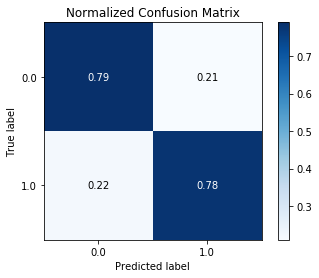

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

K Nearest Neighbors Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,15)
scores = {}
scores_list = []
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_predict)
    scores_list.append(metrics.accuracy_score(y_test, y_predict))
knn.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A

0.8908296943231441

Text(0, 0.5, 'Testing Accuracy')

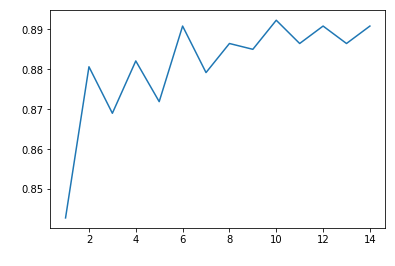

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel("Values of K for KNN",color = "white")
plt.ylabel("Testing Accuracy",color = "white")

In [54]:
knn =  KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8719068413391557

In [55]:
y_pred = knn.predict(X_test)
#y_pred = [ 0 if y>=0.5 else 1 for y in y_pred ]
#y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       614
         1.0       0.17      0.05      0.08        73

   micro avg       0.87      0.87      0.87       687
   macro avg       0.53      0.51      0.51       687
weighted avg       0.82      0.87      0.84       687



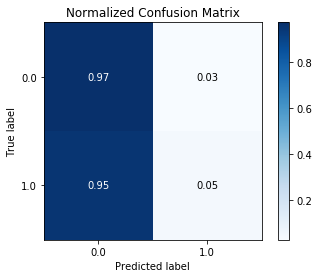

In [56]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)